Material obtido com o professor.

## Exemplo Região Convexão Não-Limitada

Consideramos: $m=2$, $\delta t=1$, Origem$=(0,0)$ e a seguinte dinâmica:
$$
\begin{pmatrix}
x_{k+1}\\
y_{k+1}\\
\dot{x}_{k+1}\\
\dot{y}_{k+1}
\end{pmatrix}
=
\begin{pmatrix}
1 & 0 & \Delta t & 0\\
0 & 1 & 0 & \Delta t\\
0 & 0 & 1 & 0\\
0 & 0 & 0 & 1
\end{pmatrix}
\begin{pmatrix}
x_k\\
y_k\\
\dot{x}_k\\
\dot{y}_k
\end{pmatrix}
+
\begin{pmatrix}
\frac{1}{2}\frac{(\Delta t)^2}{m} & 0\\
0 & \frac{1}{2}\frac{(\Delta t)^2}{m}\\
\frac{\Delta t}{m} & 0\\
0 & \frac{\Delta t}{m}
\end{pmatrix}
\begin{pmatrix}
F_{x,k}\\
F_{y,k}
\end{pmatrix}.
$$

In [ ]:
!pip install gurobipy

Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (win64 - Windows 11+.0 (26200.2))

CPU model: Intel(R) Core(TM) i7-10510U CPU @ 1.80GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 64 rows, 91 columns and 204 nonzeros
Model fingerprint: 0x5fd7c63e
Model has 30 quadratic objective terms
Coefficient statistics:
  Matrix range     [3e-01, 1e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [2e+00, 2e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+01]
Presolve removed 30 rows and 33 columns
Presolve time: 0.01s
Presolved: 34 rows, 58 columns, 134 nonzeros
Presolved model has 28 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 6.200e+01
 Factor NZ  : 3.060e+02
 Factor Ops : 3.570e+03 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual    

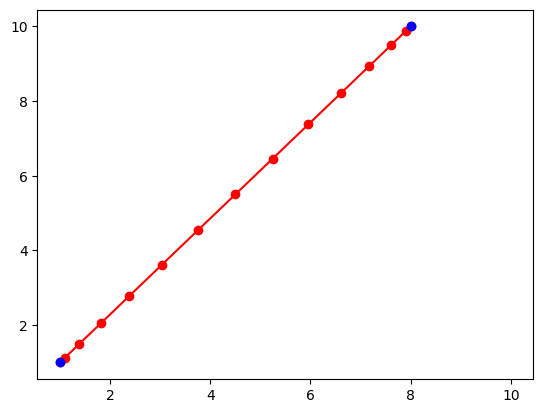

In [7]:
from gurobipy import *
import matplotlib.pyplot as plt
from gurobipy import GRB

mdl = Model('LPCnLimitado')

# Parameters equação de dinâmica
deltaT = 1.0
m = 2.0

# Rótulos para os wayponts
times = ['0','1','2','3','4','5','6','7','8','9', '10','11','12','13','14']

nWP = len(times)-1

# Variáveis do modelo
x = mdl.addVars(times, name='x')
y = mdl.addVars(times, name='y')
vx = mdl.addVars(times, name='vx', lb=-1, ub=1)
vy = mdl.addVars(times, name='vy', lb=-1, ub=1)
Fx = mdl.addVars(times,name='Fx', lb=-1, ub=1)
Fy = mdl.addVars(times,name='Fy', lb=-1, ub=1)
obj = mdl.addVar(name='obj')

# Restrições de dinâmica do veículo
mdl.addConstrs((x[times[t+1]]==x[times[t]]+vx[times[t]]*deltaT+0.5*(deltaT**2)*Fx[times[t]]/m for t in range(len(times)) if times[t] != times[nWP]), name ='xpos')
mdl.addConstrs((y[times[t+1]]==y[times[t]]+vy[times[t]]*deltaT+0.5*(deltaT**2)*Fy[times[t]]/m for t in range(len(times)) if times[t] != times[nWP]), name ='ypos')
mdl.addConstrs((vx[times[t+1]]==vx[times[t]]+deltaT*Fx[times[t]]/m for t in range(len(times)) if times[t] != times[nWP]) , name='vx')
mdl.addConstrs((vy[times[t+1]]==vy[times[t]]+deltaT*Fy[times[t]]/m for t in range(len(times))if times[t] != times[nWP]), name='vy')

# Initial Position Constraints
mdl.addConstrs((x[times[t]]==1 for t in range(len(times)) if times[t] == times[0]), name='x0')
mdl.addConstrs((y[times[t]]==1 for t in range(len(times)) if times[t] == times[0]), name='y0')
mdl.addConstrs((vx[times[t]]==0.0 for t in range(len(times)) if times[t] == times[0]), name='vx0')
mdl.addConstrs((vy[times[t]]==0.0 for t in range(len(times)) if times[t] == times[0]), name='vy0')

#Goal Position Constraints
mdl.addConstrs((x[times[t]]==8 for t in range(len(times)) if times[t] == times[nWP]), name='xGoal')
mdl.addConstrs((y[times[t]]==10 for t in range(len(times)) if times[t] == times[nWP]), name='yGoal')
mdl.addConstrs((vx[times[t]]==0.0 for t in range(len(times)) if times[t] == times[nWP]), name='x0')
mdl.addConstrs((vy[times[t]]==0.0 for t in range(len(times)) if times[t] == times[nWP]), name='y0')

#Objective function

mdl.modelSense = GRB.MINIMIZE
mdl.setObjective(quicksum( Fx[times[t]]*Fx[times[t]] + Fy[times[t]]*Fy[times[t]] for t in range(len(times))))

mdl.optimize()

temp_X = []
temp_Y = []
temp_F = []
for t in range(len(times)):
    temp_X.append(float(x[times[t]].x))
    temp_Y.append(float(y[times[t]].x))
    temp_F.append([float(Fx[times[t]].x),float(Fy[times[t]].x)])
print(temp_X)
print(temp_Y)
print(temp_F)
plt.plot(temp_X,temp_Y, '-ro')
plt.plot(8,10,'bo') # destino em azul
plt.plot(1,1,'bo') # origem em azul
plt.plot(10,10) #área de plotagem (x,y)=(10,10)
plt.show()



In [8]:
mdl = Model('LPCLimitado')

# Parameters equação de dinâmica
deltaT = 1.0
m = 2.0

# Rótulos para os wayponts
#times = ['0', '1', '2', '3', '4','5','6','7','8','9', '10','11','12','13','14']
times = ['0', '1', '2', '3', '4','5','6','7','8','9', '10', '11']
#times = ['0', '1', '2', '3', '4','5','6','7','8','9', '10']
#times = ['0', '1', '2', '3', '4','5','6','7']

nWP = len(times)-1

print(nWP)

# Variáveis do modelo
x = mdl.addVars(times, name='x')
y = mdl.addVars(times, name='y')
vx = mdl.addVars(times, name='vx', lb=-1, ub=1)
vy = mdl.addVars(times, name='vy', lb=-1, ub=1)
Fx = mdl.addVars(times,name='Fx', lb=-1, ub=1)
Fy = mdl.addVars(times,name='Fy', lb=-1, ub=1)
#aux_X = mdl.addVar(name='aux_X')
#aux_Y = mdl.addVar(name='aux_Y')
obj = mdl.addVar(name='obj')

# Restrições de dinâmica do veículo
mdl.addConstrs((x[times[t+1]]==x[times[t]]+vx[times[t]]*deltaT+0.5*(deltaT**2)*Fx[times[t]]/m for t in range(len(times)) if times[t] != times[nWP]), name ='xpos')
mdl.addConstrs((y[times[t+1]]==y[times[t]]+vy[times[t]]*deltaT+0.5*(deltaT**2)*Fy[times[t]]/m for t in range(len(times)) if times[t] != times[nWP]), name ='ypos')
mdl.addConstrs((vx[times[t+1]]==vx[times[t]]+deltaT*Fx[times[t]]/m for t in range(len(times)) if times[t] != times[nWP]) , name='vx')
mdl.addConstrs((vy[times[t+1]]==vy[times[t]]+deltaT*Fy[times[t]]/m for t in range(len(times))if times[t] != times[nWP]), name='vy')

# Initial Position Constraints
mdl.addConstrs((x[times[t]]==1.5 for t in range(len(times)) if times[t] == times[0]), name='x0')
mdl.addConstrs((y[times[t]]==1.5 for t in range(len(times)) if times[t] == times[0]), name='y0')
mdl.addConstrs((vx[times[t]]==0.0 for t in range(len(times)) if times[t] == times[0]), name='x0')
mdl.addConstrs((vy[times[t]]==0.0 for t in range(len(times)) if times[t] == times[0]), name='y0')

#Goal Position Constraints
mdl.addConstrs((x[times[t]]==8 for t in range(len(times)) if times[t] == times[nWP]), name='xGoal')
mdl.addConstrs((y[times[t]]==8 for t in range(len(times)) if times[t] == times[nWP]), name='yGoal')
mdl.addConstrs((vx[times[t]]==0.0 for t in range(len(times)) if times[t] == times[nWP]), name='x0')
mdl.addConstrs((vy[times[t]]==0.0 for t in range(len(times)) if times[t] == times[nWP]), name='y0')

#Regial Factível
mdl.addConstrs((x[times[t]] - 9*y[times[t]] <= -8 for t in range(len(times))), name='face1')
mdl.addConstrs((-9*x[times[t]] + y[times[t]] <= -8 for t in range(len(times))), name='face2')
mdl.addConstrs((x[times[t]] + 7*y[times[t]] <= 72 for t in range(len(times))), name='face3')
mdl.addConstrs((7*x[times[t]] + y[times[t]] <= 72 for t in range(len(times))), name='face4')

#Objective function

mdl.modelSense = GRB.MINIMIZE
mdl.setObjective(quicksum( Fx[times[t]]*Fx[times[t]] + Fy[times[t]]*Fy[times[t]] for t in range(len(times))))

mdl.optimize()


11
Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (win64 - Windows 11+.0 (26200.2))

CPU model: Intel(R) Core(TM) i7-10510U CPU @ 1.80GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 100 rows, 73 columns and 258 nonzeros
Model fingerprint: 0x6620b7a7
Model has 24 quadratic objective terms
Coefficient statistics:
  Matrix range     [3e-01, 9e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [2e+00, 2e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [2e+00, 7e+01]
Presolve removed 63 rows and 35 columns
Presolve time: 0.02s
Presolved: 37 rows, 38 columns, 201 nonzeros
Presolved model has 22 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 2.200e+02
 Factor NZ  : 4.210e+02
 Factor Ops : 5.599e+03 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual

[1.5, 1.6477272728020163, 2.061363636617962, 2.681818182299438, 3.450000000716366, 4.306818182730252, 5.193181819211429, 6.050000001045827, 6.818181819124469, 7.438636364331346, 7.852272727538665, 8.0]
[1.5, 1.6477272728382153, 2.0613636367327652, 2.6818181824464484, 3.450000000742701, 4.306818182395683, 5.193181818344373, 6.049999999794498, 6.818181817865813, 7.438636363408681, 7.8522727271978665, 8.0]
[[0.5909090912080648, 0.5909090913528616], [0.4727272728476535, 0.4727272728724765], [0.3545454546145965, 0.3545454544035138], [0.2363636363270829, 0.23636363592731713], [0.11818181806074723, 0.11818181749959322], [-1.9158208353076134e-10, -3.1676594680618564e-10], [-0.11818181839553299, -0.11818181767748914], [-0.23636363662718685, -0.23636363583932551], [-0.35454545486017697, -0.3545454542728954], [-0.4727272731383273, -0.4727272727407561], [-0.5909090898453399, -0.5909090912085326], [-0.0, -0.0]]
[1.6033764603246856, 1.6577245879425244, 2.975287216916819, 3.59338135773616, 4.28968005

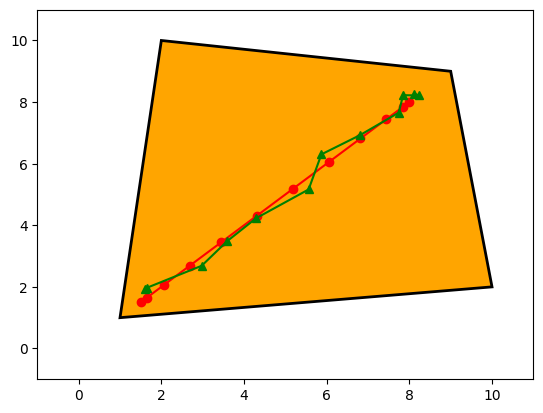

In [9]:
from matplotlib.path import Path
import matplotlib.patches as patches

verts = [
  (1., 1.),  # left, bottom
  (2., 10.),  # left, top
  (9., 9.),  # right, top
  (10., 2.),  # right, bottom
   (0., 0.),  # ignored
]

codes = [
    Path.MOVETO,
    Path.LINETO,
    Path.LINETO,
    Path.LINETO,
    Path.CLOSEPOLY,
]

path = Path(verts, codes)

fig, ax = plt.subplots()
patch = patches.PathPatch(path, facecolor='orange', lw=2)
ax.add_patch(patch)
ax.set_xlim(-1, 11)
ax.set_ylim(-1, 11)

temp_X = []
temp_Y = []
temp_F = []
for t in range(len(times)):
    temp_X.append(float(x[times[t]].x))
    temp_Y.append(float(y[times[t]].x))
    temp_F.append([float(Fx[times[t]].x),float(Fy[times[t]].x)])
print(temp_X)
print(temp_Y)
print(temp_F)
plt.plot(temp_X,temp_Y, '-ro')

from numpy import random
temp_Xr=[]
temp_Yr=[]
temp_Vx=[]
temp_Vy=[]
temp_Fx=[]
temp_Fy=[]
for t in range(len(times)):
  temp_Vx.append(float(vx[times[t]].x))
  temp_Vy.append(float(vy[times[t]].x))
  temp_Fx.append(float(Fx[times[t]].x))
  temp_Fy.append(float(Fy[times[t]].x))
for t in range(len(times)):
  temp_Xr.append(temp_X[t]+temp_Vx[t]*deltaT+0.5*(deltaT**2)*temp_Fx[t]/m + random.normal(0,0.2))
  temp_Yr.append(temp_Y[t]+temp_Vy[t]*deltaT+0.5*(deltaT**2)*temp_Fy[t]/m+ random.normal(0,0.2))
print(temp_Xr)
print(temp_Yr)
plt.plot(temp_Xr,temp_Yr, '-g^')

plt.show()